Содержание
1.  [Описание проекта](#start)
2.  [Предобработка данных](#pre)
3.  [Исследовательский анализ данных](#3)
* [3.1  Cколько игр выпускалось в разные годы](#3.1)
* [3.2  Как менялись продажи по платформам](#3.2)
* [3.2.1  Вывод](#(#3.2.1)
* [3.3  Влияние отзывов на продажи](#3.3)
* [3.3.1  Вывод](#3.3.1)
* [3.4  Общее распределение игр по жанрам](#3.4)
* [3.5  Вывод по исследовательскому анализу данных](#3.5)
4.  [Портрет пользователя каждого региона](#4)
5.  [Проверка гипотез](#5)
* [5.1  Рейтинги платформ](#5.1)
* [5.2  Рейтинги жанров](#5.1)
6.  [Общий вывод](#6)

# Сборный проект
<a id="start"></a>
## Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xbox или PlayStation). Цель исследования - используя эту информацию нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года, нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же2027-й — по данным 2026 года.

В ходе исследования сделаем следующее:

- Посмотрим сколько игр выпускалось в разные годы,
- Посчитаем продажи по платформам в разные годы,
- Изучим как влияют отзывы на продажи,
- Определим популярные жанры,
- Составим профиль покупателя по регионам.

In [1]:
# Импортируем библиотеки для работы
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
# открываем датасет
data = pd.read_csv(*)

In [40]:
# Функция для предварительного ознакомления с данными. 

def hello_data(data):
    
    ''' Выводит первые строки, 
                info, 
                уникальные значения
                и пропуски, если они есть '''
    
    columns = data.columns 
    display(data.head(10))
    display(data.info())
    lost_values = data.duplicated().sum()
   
    print(
        f'Явных дубликатов в данных: {lost_values}. Это {lost_values / len(data) * 100:.2f}% от всех значений.'
         )
    print()
        
    for column in columns: # для каждой колонки
        try:
            unique_value = (len(data[column].unique())) # считаем уникальные значения 
        except AssertionError:
            pass
        
        if data[column].isna().sum() != 0: # если в колонке есть пропуски
            print( f'Уникальных значений в колонке {column} - {unique_value}') #выводим количество уникальных значений
            persent = (data[column].isna().sum() / len(data[column]) * 100) # считаем сколько это в процентах и округляем методом "round"
            print('Пропущенных строк в колонке {} - {:.2f} %'.format(column, persent))
            print("_"*20)
        else: print( f'Уникальных значений в колонке {column} - {unique_value}') # если пропусков не нашли, то выводим количество уникальных значений  
     
hello_data(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ESRB_description,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Для всех,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Для всех,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,Для всех,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,unknown,28.31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16444 non-null  object 
 1   platform          16444 non-null  object 
 2   year_of_release   16444 non-null  int64  
 3   genre             16444 non-null  object 
 4   na_sales          16444 non-null  float64
 5   eu_sales          16444 non-null  float64
 6   jp_sales          16444 non-null  float64
 7   other_sales       16444 non-null  float64
 8   critic_score      7983 non-null   float64
 9   user_score        7463 non-null   float64
 10  rating            9768 non-null   object 
 11  ESRB_description  16444 non-null  object 
 12  total_sales       16444 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


None

Явных дубликатов в данных: 0. Это 0.00% от всех значений.

Уникальных значений в колонке name - 11426
Уникальных значений в колонке platform - 31
Уникальных значений в колонке year_of_release - 37
Уникальных значений в колонке genre - 12
Уникальных значений в колонке na_sales - 401
Уникальных значений в колонке eu_sales - 307
Уникальных значений в колонке jp_sales - 244
Уникальных значений в колонке other_sales - 155
Уникальных значений в колонке critic_score - 82
Пропущенных строк в колонке critic_score - 51.45 %
____________________
Уникальных значений в колонке user_score - 96
Пропущенных строк в колонке user_score - 54.62 %
____________________
Уникальных значений в колонке rating - 9
Пропущенных строк в колонке rating - 40.60 %
____________________
Уникальных значений в колонке ESRB_description - 5
Уникальных значений в колонке total_sales - 1004


К датасету прилагалось описание:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.


**Выводы**

При первичном анализе видим несоответствие типа данных  содержимому в коколонках "Year_of_Release" и "User_Score". Год выпуска игры нужно привести к типу int, а оценку пользователей к типу float. Названия всех колонок приведем к нижнему регистру.

Также видим пропуски значений. Больше всего их в оценках критиков- 51.32 %, оценках пользователей - 40.09 % и рейтинге ESRB - 40.48 %. Пока не очень понятно что с этим делать. Менять отсутствующие значения на медианные для половины всех значений не имеет смысла. Но, судя по колонке года выпуска игр, у нас есть данные с самой зари игровой индустрии-37 уникальных значений(лет). Есть предположение, что рейтинги появились гораздо позже и исследуя современные игры мы увидим больший процент заполненных оценок. Пока оставляем как есть.

Незначительное количество пропусков есть в колонке названий, годе выпуска и жанре от 0,01% до 1,6%. Их можно просто удалить.

У нас есть данные о продажах в разных регионах(Северная Америка, Япония, Европа), эффективнее будет работать с общим числом проданных копий для каждой игры. Создадим колонку 'total_sales'.

Еще работать с рейтингом ESRB, в котором рейтинги обозначены символами, не очень удобно. Создадим отдельную колонку с расшифровками 'ESRB_description'.


## Предобработка данных
<a id="pre"></a>

In [41]:
# переименовываем колонки - понижаем регистр
data.columns = data.columns.str.lower()

# делаем срез строк с отсутствующим названем игр
name_nan = data.query('name.isnull()')
name_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb_description,total_sales


Всего 2 игры за 1993 год. Здесь же видим пропуски по жанру. Можно спокойно удалить.

In [42]:
# удаляем строки с NaN в названиях
data= data.dropna(subset=['name'])

# делаем срез по отсутствующим годам
year_nan = data.query('year_of_release.isnull()')
year_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb_description,total_sales


Всего 269 строк. Видим множество 0 и NaN. Нам эти данные не сильно помогут в исследовании. 

In [43]:
# удаляем строки с NaN 
data= data.dropna(subset=['year_of_release'])

# проверочка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16444 non-null  object 
 1   platform          16444 non-null  object 
 2   year_of_release   16444 non-null  int64  
 3   genre             16444 non-null  object 
 4   na_sales          16444 non-null  float64
 5   eu_sales          16444 non-null  float64
 6   jp_sales          16444 non-null  float64
 7   other_sales       16444 non-null  float64
 8   critic_score      7983 non-null   float64
 9   user_score        7463 non-null   float64
 10  rating            9768 non-null   object 
 11  esrb_description  16444 non-null  object 
 12  total_sales       16444 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


Теперь займемся исправлением типа данных.

При первой попытке поменять тип данных в колонке оценок пользователей словили ошибку "ValueError: could not convert string to float: 'tbd'". Гугл сообщает, что в контексте оценок игр аббревиатура "tbd" означает невыставленный рейтинг, т.е. по сути те же Nan. Потому поменяем сначала в колонке 'user_score' значение "tbd" на Nan, затем поменяем тип данных на float64. Для колонки 'year_of_release' сделаем тип int64.

In [44]:
# меняем значение "tbd" на NaN
data['user_score'] = data['user_score'].replace("tbd", np.NaN) 

#меняем типы данных
data['year_of_release'] = data['year_of_release'].astype('int64')
data['user_score'] = data['user_score'].astype('float64')

# смотрим уникальные значения рейтинга ESRB
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Мы предварительно ознакомились со значениями этих аббревиатур и теперь создадим словарь, по значениям которого и заполним колонку. Интерес для нас представляют 2 значения: «E» («Everyone») — «Для всех» и K-A («Kids to Adults»)— «Для детей и взрослых». Рейтинг K-A устаревший и теперь используется «E». Поэтому присвоим этим ключам одинаковые значения.

In [47]:
# создаем словарь с расшифровкой
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '>13 лет', 'E10+': '>10 лет', 'K-A': 'Для всех'}
# создаем новую колонку и заполняем значениями из словаря
data['ESRB_description'] = data['rating'].map(ESRB_dict)

#заполняем отсутствующие значения заглушкой "unknown"
data['ESRB_description'] = data['ESRB_description'].fillna('unknown')


# Добавляем столбец total_sales с суммарными продажами
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb_description,total_sales,ESRB_description
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Для всех,82.54,Для всех
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,unknown,40.24,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Для всех,35.52,Для всех
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Для всех,32.77,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,unknown,31.38,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,unknown,30.26,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,Для всех,29.80,Для всех
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,Для всех,28.91,Для всех
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,Для всех,28.32,Для всех
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,unknown,28.31,unknown


**Вывод**

Мы привели название колонок к стандартному виду и удалили строки с пропусками в названиях и годах релиза игры. Нашли в оценках неопределенный рейтинг "tbd" и заменили его на Nan. Привели в соответствие типы данных. Оценки критиков и юзеров заполнять не стали, нам еще не понятно в каких случаях эти оценки отсутсвуют. Создали колонки с итоговыми продажами и значениями рэйтинга ESRB. Теперь можно переходить к исследованию.

<a id="3"></a>
## Исследовательский анализ данных


Мы уже знаем, что данные собраны примерно за 37 лет- большое поле для исследований. 

Для начала посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды. В самом начале игр создавалось не много и сравнивать данные за 1988 и за 2016 может быть не целесообразно.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Найдем за какой характерный срок появляются новые и исчезают старые платформы. И уже ориентируясь на эти сроки возьмем для дальнейшего исследования данные за соответствующий актуальный период. 

Посмотрим как влияют отзывы на продажи и какие жанры самые популярные. 

Эти данные помогут построить прогноз на 2017 год - какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

<a id="3.1"></a>
### Cколько игр выпускалось в разные годы

C:\Users\Jane\anaconda3\envs\practicum\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Количество выпущенных игр')

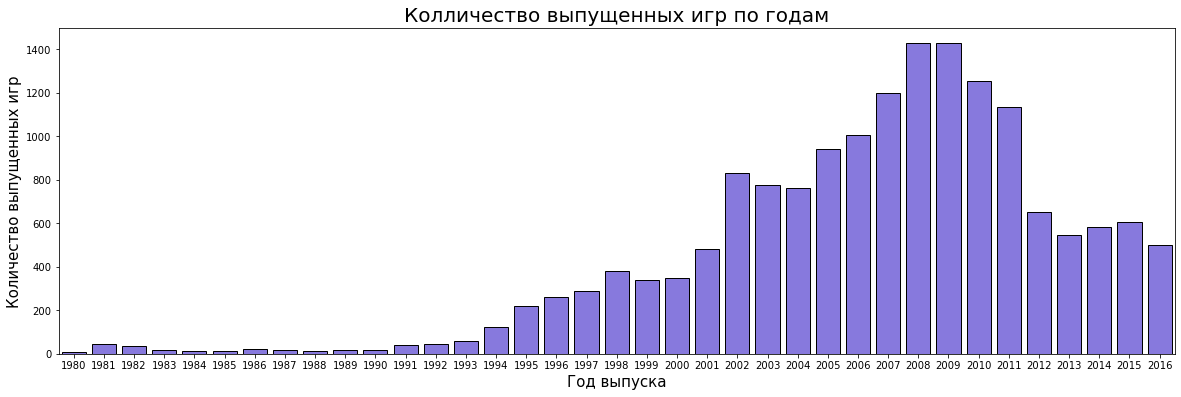

In [48]:
plt.figure(figsize=(20, 6))
sns.countplot(data.year_of_release, color = 'mediumslateblue', ec='black')
plt.title("Колличество выпущенных игр по годам", fontsize = 20)
plt.xlabel("Год выпуска", fontsize = 15)
plt.ylabel("Количество выпущенных игр", fontsize = 15)

Наше первоначальное предположение подтвердилось. До 1991 игры пратически не выпускались, затем наметился рост. Индустрия начала развиваться вместе с развитием компьютерных технологий. Резкий скачок произошел в 2002 году - было выпущено более 800 игр, а к 2008 производство игр достигло максимума - более 1400 игр за год. Начиная с 2012 заметно резкое снижение количества выпускаемых игр. Можно предположить, что это связано с развитием мобильных устройств и игр для них. Телефон стал неотъемлемой частью повседневной жизни большинства людей, игры для смартфона стоят недорого, если вообще нужно платить. А консоль и игры к ней - дорогое развлечение, следовательно спрос на такие игры упал. Возможно также, что производители игр стали уделять качеству игр больше внимания и не гонятся за количеством, предпочитая создавать более сложные, реалистичные игры.

<a id="3.2"></a>
### Как менялись продажи по платформам

In [50]:
# Создадим сводную таблицу платформ  и отсортируем ее по самым высоким продажам:
platform_on_sales = data.pivot_table(index='platform', values='total_sales', aggfunc = 'sum')\
                        .sort_values(by='total_sales', ascending=False).reset_index()
# посмотрим на топ 10
platform_on_sales.head()

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Text(0.5, 1.0, 'Продажи по платформам за весь период')

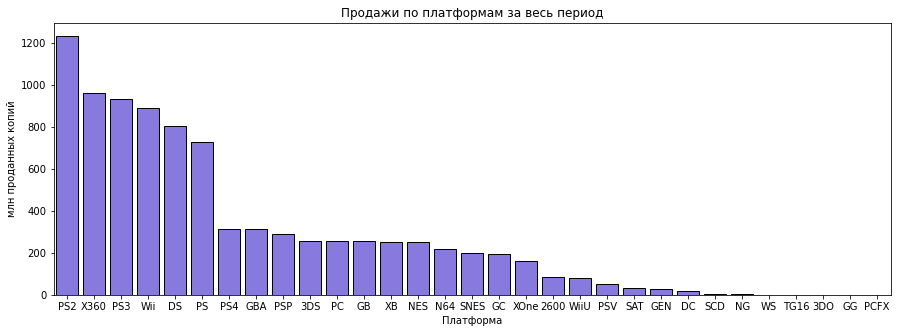

In [51]:
# Поcтроим график по прадажам 
plt.figure(figsize=(15, 5))
sns.barplot(x=platform_on_sales.platform, y=platform_on_sales.total_sales, color = 'mediumslateblue', ec='black')
plt.xlabel("Платформа")
plt.ylabel("млн проданных копий")
plt.title("Продажи по платформам за весь период")

Отчетливо видно 6 платформ - лидеров по продажам за всё время. Теперь для этих 6ти платформ посмотрим продажи по годам.

In [52]:
# создаем список платформ
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
# создаем таблицу распределения продаж по годам и платформе 
platform_per_years = pd.DataFrame(data.groupby(['platform','name','year_of_release'])['total_sales'].sum())
platform_per_years
# делаем срез по списку платформ
platforms_top = platform_per_years.query('platform in @platform_list').reset_index()
# проверяем
platforms_top

,platform,name,year_of_release,total_sales
0,DS,Frozen: Olaf's Quest,2013,0.51
1,DS,007: Quantum of Solace,2008,0.13
2,DS,1 vs. 100,2008,0.09
3,DS,100 All-Time Favorites,2009,0.51
4,DS,100 Classic Books,2008,0.66
...,...,...,...,...
9256,X360,[Prototype],2009,1.31
9257,X360,de Blob 2,2011,0.15
9258,X360,nail'd,2010,0.11
9259,X360,pro evolution soccer 2011,2010,0.60


Через subplot выведем графики для всех 6ти самых популярных платформ и посмотрим для каждой из них продажи по годам.

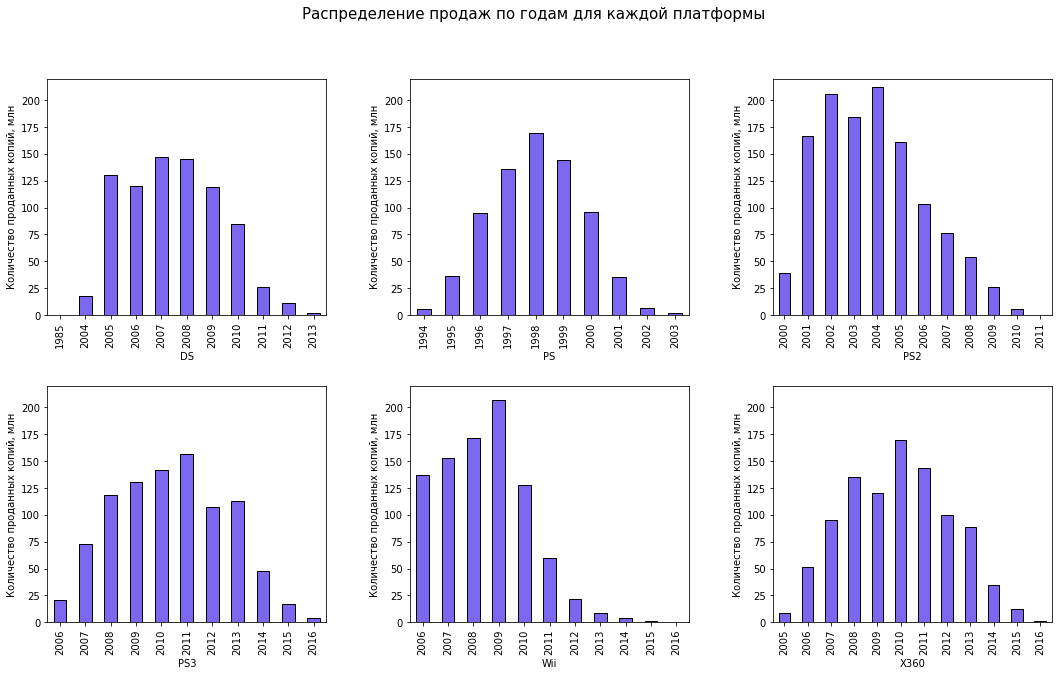

In [53]:
# функция для отрисовки графиков с одинаковыми параметрами
def draw_graph(i, platf):
    plt.subplot(2, 3, i) #  i - место графика на сабплоте
    # делаем срез по названию платформы
    # и группируем по году, суммируем по количеству проданных игр
    platforms_top.query('platform == @platf').groupby('year_of_release')['total_sales'].sum().plot( kind='bar', color='mediumslateblue', ec='black') # задаем вид графика и параметры
    plt.xlabel(platf)
    plt.ylabel('Количество проданных копий, млн')
    plt.ylim(0, 220)
    
# функция для перебора платформ
def create_graphs():
    i = 1 # начинаем с 1 места на графике
    for name_platform in platforms_top['platform'].unique(): # для каждой платформы
        draw_graph(i, name_platform) # нарисуй график
        i += 1 
# теперь рисуем      
plt.figure(figsize = (18, 10)).suptitle('Распределение продаж по годам для каждой платформы', fontsize = 15)   
plt.subplots_adjust(hspace=0.3, wspace=0.3)
create_graphs()


У каждой платформы есть свой взлет и падение. Платформы были на пике популярности в разные года и даже десятилетия. 

Вот что можно сказать про каждую:

В нашем топ_6 есть три поколения Playstation.

**PS** - существала с 1994 года до 2003 -9 лет, но с выпуском в 2000 году PS2, стала активно сдавать позиции;

**PS2** - с 2000 до 2011 года продержалась 11 лет, с 2005 года наметилось снижение продаж, которое  в 2006 усилилось с выходом PS3;

**PS3** - с 2006 по 2016 присутствовала на рынке (на конец исследуемого периода), но начала сильно сдавать позиции с выходом в  ноябре 2013 года PS4. Осенью 2016 года Sony выпустила две новые аппаратные версии приставки: PlayStation 4 Slim и PlayStation 4 Pro, что, видимо, окончательно добило продажи PS3;

**DS** -  на график отмечен 1985, потом нет данных. В инернете информации за тот период тоже не нашлось, но известно, что в 2004 стартовали продажи модели Nintendo DS и популярность стала расти, пик в 2008, с 31 августа 2013 поддержка пользователей прекращена. Просущестовала почти 9 лет;

**Wii** ,тоже оказывается консоль фирмы Nintendo, - с 2006  по 2016 присутствовала на рынке (на конец исследуемого периода), с 2010 по 2012 имела резкое снижение по продажам, поддержка прекращена 20 октября 2013, но продажи были еще до 2015(видим на графике) - срок жизни 9 лет.

**X360** продавалась с 2005 и, спустя 10 лет, в апреле 2016(по данным из интернета) снята с производства. На графике видим очень малое значение продаж за 2016 год.


Таким образом, консоль живет в среднем 10 лет,  с пиком популярности на 4-5 год. Затем на смену приходят более совершенные в техническом плане новые модели. Учитывая, что уже на 4 год платформа может достигнуть пика продаж, после которого начинается спад, то для дальнейшего исследования актуальным будем считать период в 3 года с 2013 по 2016 год.



In [54]:
# создаем срез данных за последние 10 лет по всем платформам
platforms_after_2013 = data.query('year_of_release >= 2013')
platforms_after_2013

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,esrb_description,total_sales,ESRB_description
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,> 17 лет,21.05,> 17 лет
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,> 17 лет,16.27,> 17 лет
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,unknown,14.63,unknown
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,unknown,14.60,unknown
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,> 17 лет,12.62,> 17 лет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,unknown,0.01,unknown
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,unknown,0.01,unknown
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,unknown,0.01,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,unknown,0.01,unknown


<function matplotlib.pyplot.show(close=None, block=None)>

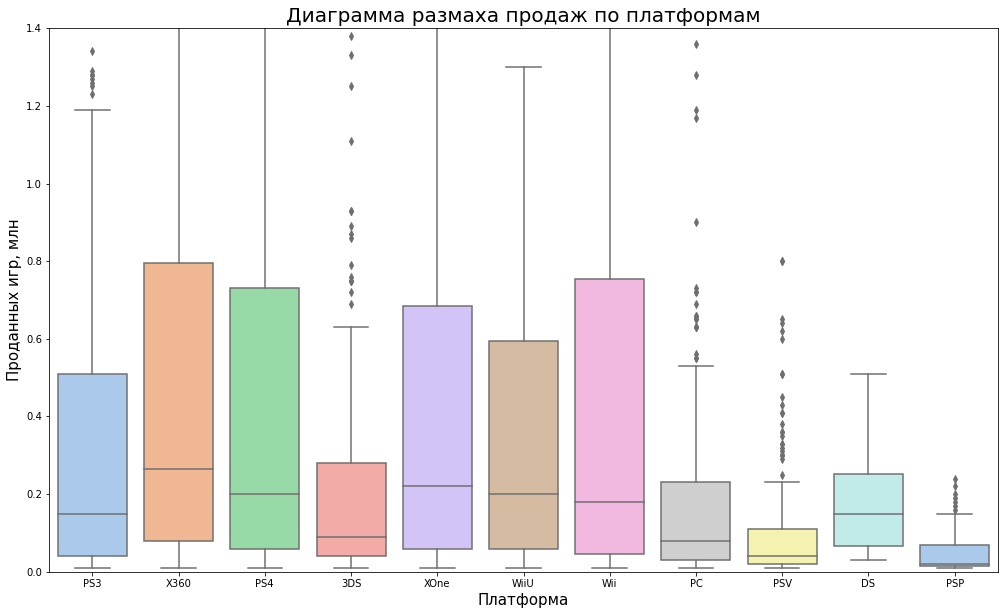

In [55]:
# рисуем боксплоты по продажам за последние 3 года среди всех платформ
fig = plt.figure(figsize=(17,10))
sns.boxplot(data= platforms_after_2013, x='platform', y='total_sales', palette=sns.color_palette('pastel'))
#sns.color_palette('pastel')
plt.title("Диаграмма размаха продаж по платформам", fontsize=20)
plt.xlabel("Платформа", fontsize=15)
plt.ylabel("Проданных игр, млн", fontsize=15)
plt.ylim(0, 1.4) # ограничили по оси Y для информативности
plt.show

Лидер продаж за последние 3 года - x360, второе место, с минимальным разницей, у PS4 и Wii. Третье место у XOne. Интересная получилась картина. На графике продаж по годам было видно как сильно просел рынок в 2012. До конца исследуемого периода (2016 год) выпускается всё меньше игр. Исследуя продажи по платформам за весь период нашли, что больше всего игр продано для 'PS2', далее по убывающей - 'X360', 'PS3', 'Wii', 'DS', 'PS'. Но теперь на боксплоте видим 'PS4' которая появилась только в конце 2013 года и даже не попала в наш топ 6 платформ, однако на фоне общего спада продаж успела за 3 года взлететь. 

<a id="3.2.1"></a>
#### Вывод
Мы определили срок жизни платформы в 10 лет с пиком на 4-5 год жизни. Изучив продажи  по платформам можно с уверенностью сказать, что при прогнозе успешности продаж ориентироваться нужно на  платформы, которые находяться в стадии роста, т.е. до 3х лет. Также можно сказать, что у нас определились 2 крупных игрока на рынке- Playstation и Xbox. Соревнуясь в выпуске новых моделей они забрали себе львинную долю рынка.

<a id="3.3"></a>
### Влияние отзывов на продажи

Возьмем лидера по продажам - платформу X360 и на ее примере посмотрим как зависят продажи от оценок юзеров и критиков. Последовательно построим диаграммы рассеяния и посчитаем корреляцию по каждому виду оценок. Затем сравним полученный результат с данными по всем платформам.

Text(0, 0.5, 'Проданных игр, млн')

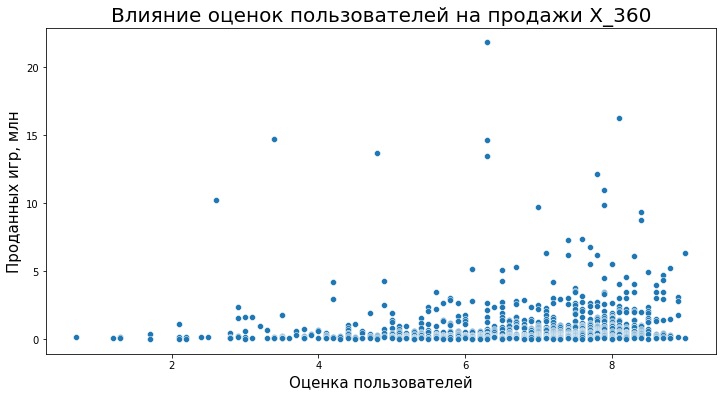

In [56]:
# делаем срез
X_360 = data[data['platform']=='X360']

#Построим диаграмму рассеяния для оценок пользователей
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=X_360)
plt.title('Влияние оценок пользователей на продажи X_360', fontsize=20)
plt.xlabel("Оценка пользователей", fontsize=15)
plt.ylabel("Проданных игр, млн", fontsize=15)

In [57]:
#Корреляция между оценками пользователей и продажами 
X_360['user_score'].corr(X_360['total_sales'])

0.11418661214018036

Text(0, 0.5, 'Проданных игр, млн')

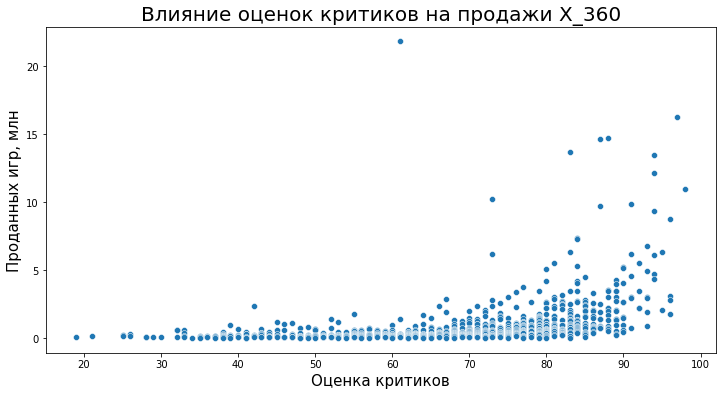

In [58]:
#Построим диаграмму рассеяния для оценок критиков
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=X_360)
plt.title('Влияние оценок критиков на продажи X_360', fontsize=20)
plt.xlabel("Оценка критиков", fontsize=15)
plt.ylabel("Проданных игр, млн", fontsize=15)

In [59]:
#Корреляция между оценками критиков и продажами X_360
X_360['critic_score'].corr(X_360['total_sales'])

0.39286589254007037

Продажи X_360 имеют некоторую зависимость от оценок. Но только для оценок пользователей корреляция слабая - 0,11 и присутствует большой разброс данных, а вот оценки критиков это уже выраженная корреляция - 0,39, впрочем, у высоко оцененных критиками игр разброс тоже большой.

Теперь посмотрим можно ли сделать такие же выводы по всем играм в целом, или такая зависимость свойственна только играм для X_360.
Построим  диаграммы рассеяния и посчитаем корреляцию используя данные по всем платформам за актуальный для нас период с 2006 года.

Text(0, 0.5, 'Проданных игр, млн')

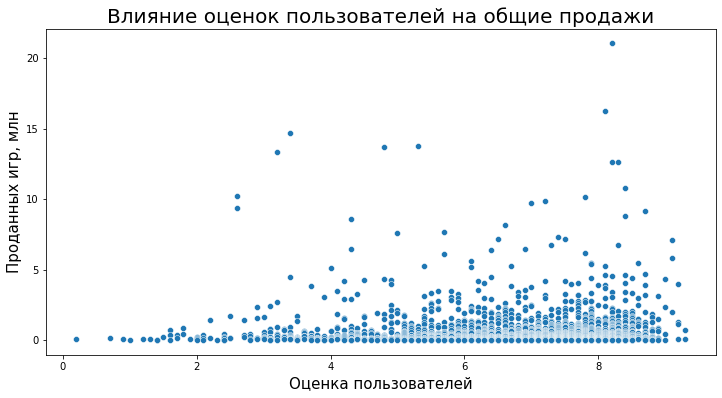

In [62]:
data_after_2011 = data.query('year_of_release >= 2011')

#Построим диаграмму рассеяния для оценок пользователей
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=data_after_2011)
plt.title('Влияние оценок пользователей на общие продажи', fontsize=20)
plt.xlabel("Оценка пользователей", fontsize=15)
plt.ylabel("Проданных игр, млн", fontsize=15)

In [63]:
#Корреляция между оценками критиков и общие продажи 
data_after_2011['user_score'].corr(data_after_2011['total_sales'])

0.03163612772559287

Text(0, 0.5, 'Проданных игр, млн')

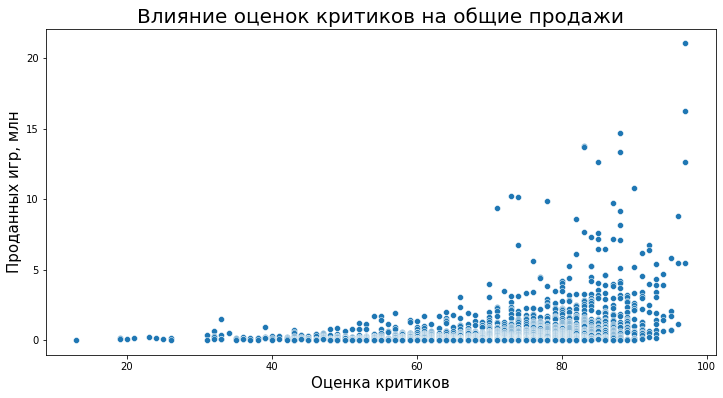

In [30]:
#Построим диаграмму рассеяния для оценок критиков
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=data_after_2011)
plt.title('Влияние оценок критиков на общие продажи', fontsize=20)
plt.xlabel("Оценка критиков", fontsize=15)
plt.ylabel("Проданных игр, млн", fontsize=15)


In [31]:
#Корреляция между оценками критиков и продажами 
data_after_2011['critic_score'].corr(data_after_2011['total_sales'])

0.32997650501145853

#### Вывод
Уровни корреляций сопоставимы. Для оценок пользователей корреляция очень слабая от 0,03 до 0,11 а для оценок критиков умеренная от 0,32 до 0,39. Это можно наблюдать и на графиках продаж для X_360 и для всех платформ в целом. На диаграммах рассеяния по оценкам пользователей видно большое количество  выбросов вне зависимости от рейтинга. У игр с высокими оценками критиков хорошо  заметна высокая плотность точек, таких продаж явно большинство, но здесь также виден сильный разброс точек.
Можно сделать вывод, что ориентироваться нужно на оценки критиков, а не пользователей, но и это не гарант успешных продаж.

<a id="3.4"></a>
### Общее распределение игр по жанрам

Посмотрим какие жанры игр являются самыми популярными. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


Text(0, 0.5, 'Млн проданных копий')

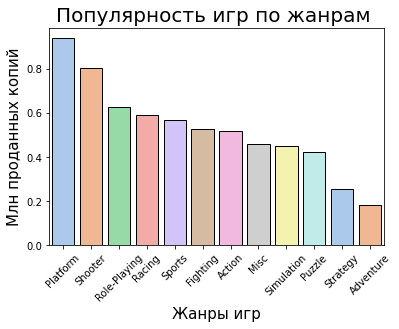

In [64]:
# Создадим сводную таблицу по жанру и продажам, отсортируем
genre = pd.pivot_table(data, index='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False).reset_index()

# Построим барплот по жанрам
plt.figure()
plt.title('Популярность игр по жанрам ',fontsize=20)
sns.barplot(data=genre, x='genre', y='total_sales', palette=sns.color_palette('pastel'), ec='black',)
plt.xlabel('Жанры игр',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Млн проданных копий',fontsize=15)



Самый популярный жанр, оказывается, Platform- игры типа Super Mario. Второе место у стрелялок, третье  за ролевыми играми. На последних местах по популярности игры, где надо думать - пазлы, стратегии и приключенческие. И тут все логично. В игры, обычно, играют чтобы отвлечься. Во всяком случае рядовые пользователи. Будущие аналитики с детства предпочитают стратежки :)

<a id="3.5"></a>
### Вывод по исследовательскому анализу данных

Начиная с 90х годов начался бум в компьютерной и консольной игровой индустрии, Золотым веком стал 2008-2009 год, тогда выпускалось 1400 игр в год. После 2009 года, когда уже появились сенсорные телефоны и массово начали создавать мобильные приложения и мобильные игры, наметилось снижение спроса и, соответственно, спад разработок игр на игровые платформы, ну либо производители сосредоточились на более крупных проектах в ущерб количеству.
Самые популярные игровые платформы за весь период: Sony PlayStation 2, Xbox 360, Sony Playstation 3, WII,  DS, Sony Playstation.
В среднем  игровые платформы живут 10 лет. Пик продаж наступает примерно через 4-5 лет после выхода приставки. В исследовании  сосредоточились на данных за последние 3 года и это оправдалось. Мы нашли резкий рост продаж для трехлетней PS4. на этот срок и стоит ориентироваться в будущем, составляя прогнозы успешности продаж.
Несомненные лидеры рынка сейчас это Sony Playstation 4 и Xbox 360.У всех платформ наблюдается взаимосвязь между продажами и оценками критиков. 

<a id="4"></a>
## Портрет пользователя каждого региона

У нас есть данные о продажах по различным регионам:

- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)

Определим для каждого региона топ-5 платформ, топ-5 популярных жанров и посмотрим на рейтинг ESRB. Сравним показатели, опишем отличия. Данные смотрим за последние 10 лет по переменной "platforms_after_2013"

In [65]:
# создадим функцию для отрисовки графиков, которая строит сводную таблицу по выбранному параметру и по этой таблице строит графики для каждого региона
def top_region_sales(groupby, region_sales, ax): # 1 аргумент- параметр по которому строим график, 2 аргумент- регион, 3 аргумент - определяет позицию в subplots
    pivot = platforms_after_2013.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5] # строим сводную таблицу по параметру и региону продажи, сортируем и оставляем первые 5 значений
    title_dict = {'na_sales': 'Продажи в Северной Америке', 'eu_sales': 'Продажи в Европе', 'jp_sales': 'Продажи в Японии'} # словарь названий графиков
    color_dict = {'na_sales': 'mediumslateblue', 'eu_sales': 'magenta', 'jp_sales': 'palegreen'} # словарь каким цветом рисовать график по региону
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], # рисуем график
                   fontsize=20, color=color_dict[region_sales], rot=30)
    plot.title.set_size(20)

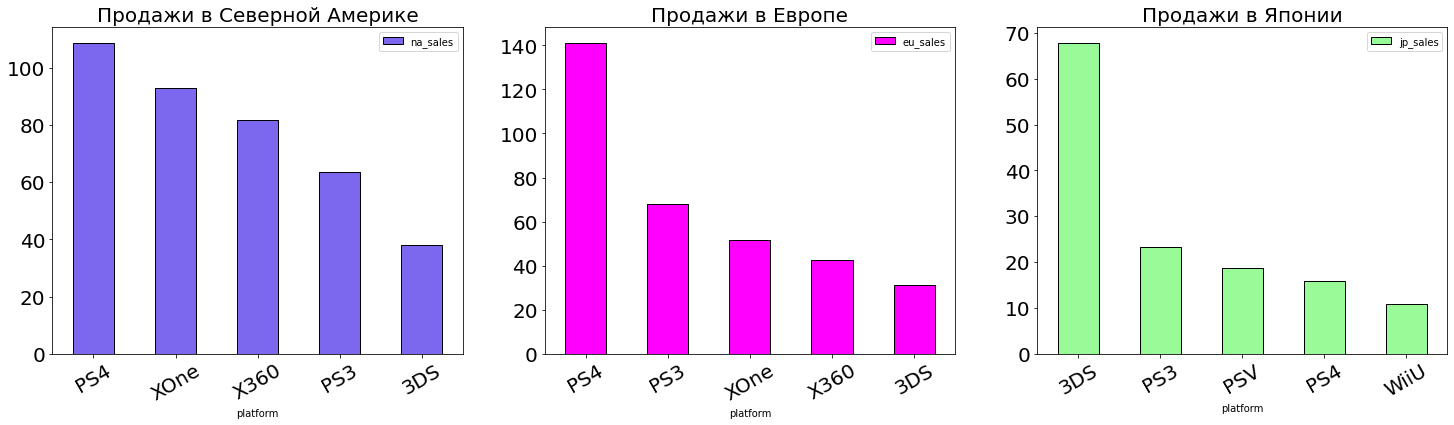

In [66]:
#  самые популярные платформы по регионам продаж
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_region_sales('platform', 'na_sales', 0)
top_region_sales('platform', 'eu_sales', 1)
top_region_sales('platform', 'jp_sales', 2)

Картина для Европы и Сверной Америки похожа- наши 2 лидера XBox и Playstation соревнуются между собой. Несомненный лидер - современная PS4. Японцы предпочитают свою местную 3DS, но и PS3 и PS4 тоже пользуется  относительной популярностью. 

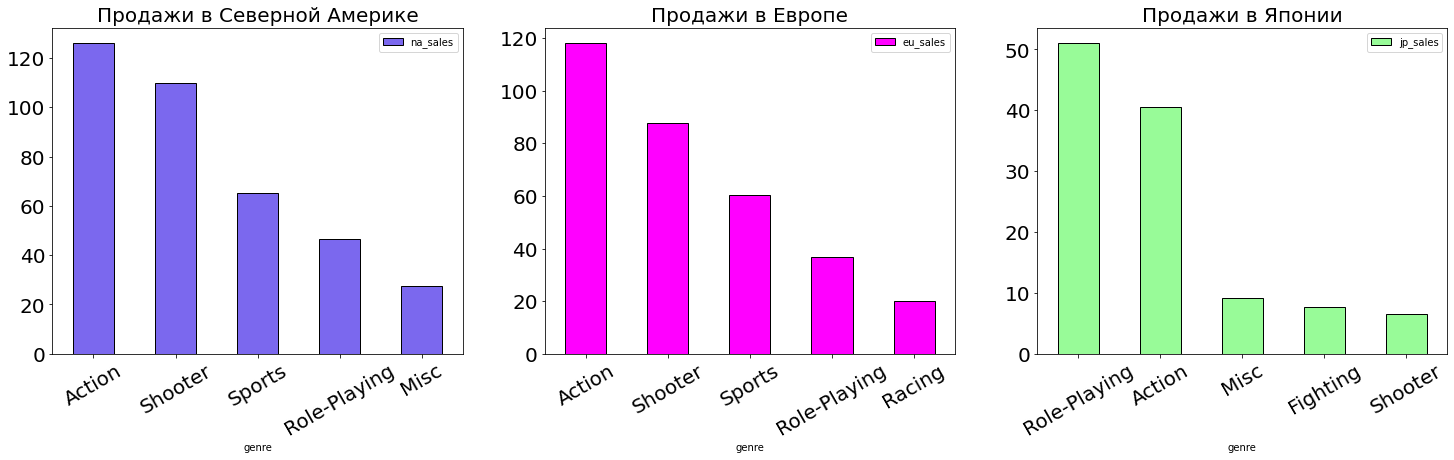

In [67]:
#  самые популярные жанры по регионам продаж
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_region_sales('genre', 'na_sales', 0)
top_region_sales('genre', 'eu_sales', 1)
top_region_sales('genre', 'jp_sales', 2)

Снова поведение Американцев и Европейцев похоже, они выбирают одни и те же жанры - 5 из 6ти совпадают. Самый популярный Action. Японцы в отличие от них больше предпочитают Role-Plaing игры, но и Action в почете.

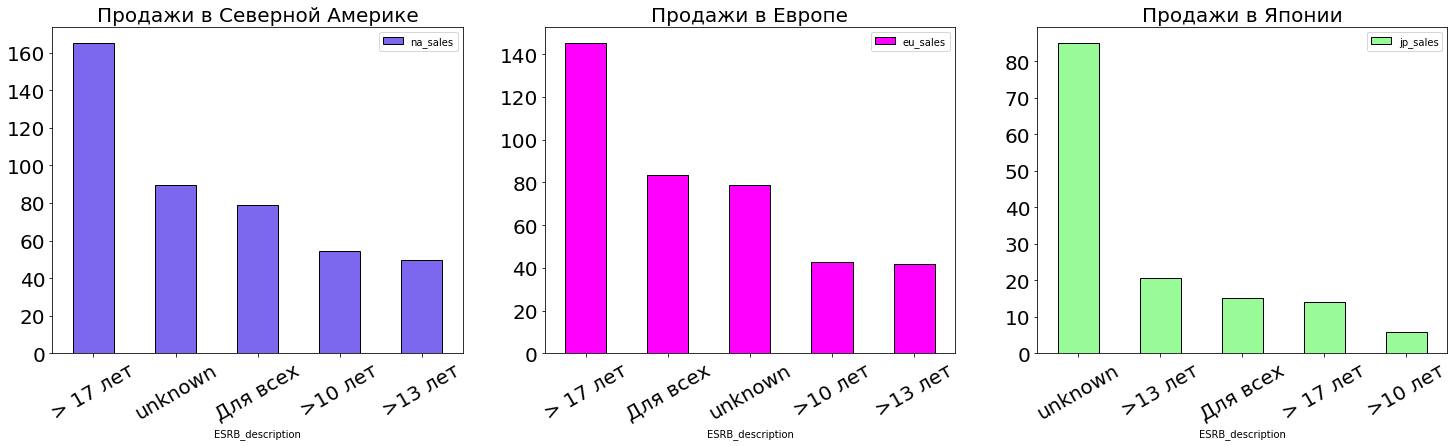

In [68]:
# рейтинг игр по регионам
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_region_sales('ESRB_description', 'na_sales', 0)
top_region_sales('ESRB_description', 'eu_sales', 1)
top_region_sales('ESRB_description', 'jp_sales', 2)

Самые популярные игры в Европе и Америке категории "> 17 лет", далее идут "для всех" и игры с возрастным цензом до 10 лет. Есть на графике и категория "Unknown". Скорее всего к моменту сбора данных эти игры еще не получили рейтинг.

Учитывая, что в Японии популярны другие консольные игры, а рейтинг ESRB предназначен для програмного обеспечения используемого на территории Канады и США можно предположить, что игры в которые играют японцы не получали такой рейтинг. 

### Вывод

Европейцы и Американцы как братья близнецы. Одни и те же любимые платформы и игры для них. Соответственно и распределение по возрастномe рейтингу одинаковое. А вот Японцы на своей волне. С большим отрывом лидирует местный производитель консолей Nintendo со своей 3DS, любимый жанр -ролевые игры, для которых не проводилась оценка по рейтингу ESRB. Прогнозируя продажи для различных регионов на будущее азиатский рынок нужно просчитывать отдельно, слишком уж они не вписываюся в общую картину.

<a id="5"></a>
## Проверка гипотез

<a id="e"></a>
В задачи исследования входило проверить 2 гипотезы:

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

Так как у нас и по платформам и по жанрам независимые данные(выборки), то для проверки обеих гипотез будем использовать t-критерий Стьюдента, у нас достаточно большие и равные по размеру выборки и нет оснований думать, что дисперсии генеральных совокупностей разные, поэтому
Примем equal_var  = True,

Пороговое значение alpha = 0.05.


<a id="work"></a>
<a id="5.1"></a>
### Рейтинги платформ:

- **Н0 (нулевая гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [38]:
# создаем срез по платформе и выставленной оценке пользователями
xone_rating = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']

pc_rating= data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']


alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone_rating, 
    pc_rating,
    equal_var = True) 

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые")

p-значение: 0.00001
Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные


<a id="5.2"></a>
### Рейтинги жанров:

- **Н0 (нулевая гипотеза)** - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- **Н1 (альтернативная гипотеза)** - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [39]:
# создаем срез по жанру и выставленной оценке пользователями
action_rating = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]
sports_rating = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]

results = ttest_ind(
    action_rating['user_score'], 
    sports_rating['user_score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются между собой")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports одинаковые")
    print('Средняя оценка пользователей для жанра "Action" - {:.2f}'.format(action_rating['user_score'].mean()))
    print('Средняя оценка пользователей для жанра "Sports" - {:.2f}'.format(sports_rating['user_score'].mean()))

p-значение:  0.06480928064420527
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports одинаковые
Средняя оценка пользователей для жанра "Action" - 7.06
Средняя оценка пользователей для жанра "Sports" - 6.95


<a id="sr"></a>
При проведении теста Стьюдента у нас не получилось отвергнуть нулевую гипотезу, учитывая минимальную разницу значений средних оценок для жанра "Action" - 7.06 и для жанра "Sports" - 6.95 будем считать, что статистически  рейтинги одинаковы.

## Общий вывод

На этапе предобработки мы привели название колонок к стандартному виду и удалили строки с пропусками в названиях и годах релиза игры. Нашли в оценках неопределенный рейтинг "tbd" и заменили его на  подходящий по смыслу Nan. Привели в соответствие типы данных. Создали колонки с итоговыми продажами и значениями для рэйтинга ESRB. Остался вопрос как данные собирались из открытых источников. Пропущенные названия 2 игр и оценок за 1993 год еще можно простить за незначительностью, а вот 269 пропущеных значений в колонке релиза игры или большого количества невыставленых оценок и рейтинга оставляют вопросы. Возможно даные собраны не совсем корректно, а, возможно, просто таких данных не было в источнике. Но имеем что имеем.

Исследовательский анализ дал понять как развивалась индустрия игр. До 90х выпускалось не более 50 игр в год, а с 1994 года начался  существенный рост, который продолжал быстро увеличиваться от года к году. Пиком стал 2008 год, когда было выпущено более 1400 игр, но уже после 2009 года началось падение количественного показателя. После 2012 года началось такое же резкое снижение количества выпускаемых игр. Можно связать это с переориентацией производства на более сложные технически, зрелищные игры. Для несложных теперь есть мобильные телефоны.

В ходе исследования пришли к выводу, что активно платформа живет 10 лет, затем на смену приходят более современные модели.  Лучше всего дела обстоят на 4-5 году существования, потом начинается спад. Для прогноза продаж, как показал пример PS4, лучше ориентироваться на 3 года. Определили также и лидеров рынка это XBOX и Playstation- они, соревнуясь между собой, оттягивают на себя большую часть продаж и, скорее всего, со временем вытеснят мелких производителей окончательно. 
Оценки критиков умеренно влияют на продажи корреляция составляет 0,32-0,39. К ним можно прислушиваться, но не стоит брать их оценку за основу прогноза успешности игры.

Самым популярным жанром стали платформенные игры типа SuperMario, затем идут шутеры, ролевые и спортивные игры. Впрочем, по регионам картинка отличается.

Изучая пристрастия пользователей по региону проживания нашли, что вкусы японцев довольно специфичны. Начиная от выбора платформы в пользу Nintendo- 3DS, до предпочтения в жанрах. Вот что получили:

Самые популярные платформы (топ-5)

- Европа: PS4, PS3, XOne, X360, 3DS, 
- Северная Америка: PS4, XOne,  X360, PS3, 3DS, 
- Япония: 3DS, PS3, PSV, PS4, Wii

Самые популярные жанры (топ-5)

- Европа: Action, Shooter, Sports, Role-Playing, Racing
- Северная Америка: Action, Shooter, Sports, Role-Playing, Misc, 
- Япония: Role-Playing, Action, Misc, Fightig, Shooter

Влияние рейтинга ESRB распространяется на Европу и Америку, но н действует на Японию, здесь сумарные продажи у игр без рейтинга выше.

Мы выдвинули и проверили 2 гипотезы о равенстве пользовательских рейтингов платформ и игровых жанров. Статистически доказали, что средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой, а вот средние пользовательские рейтинги жанров Action и Sports одинаковы.